Слово должно состоять только из русских букв (без пробелов и знаков препинания), попробуй еще раз
Слово должно состоять только из русских букв (без пробелов и знаков препинания), попробуй еще раз


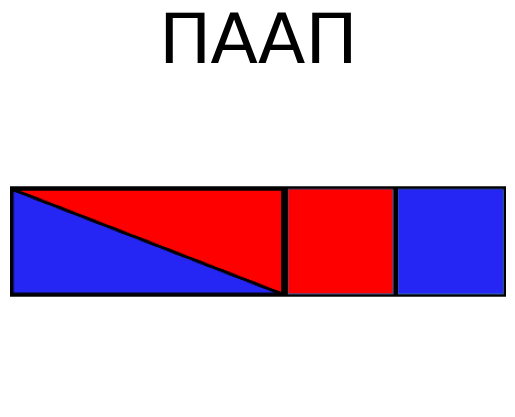

In [3]:
from utils.utils import is_all_cyrillic, get_word_scheme, vis_image_scheme

while True:
    word = input("Введи слово на русском языке (для выхода введи Q или Й) ")
    if word in 'QqЙй':
        break
    if word.isalpha() == False or is_all_cyrillic(word) == False:
        print(f'Слово должно состоять только из русских букв (без пробелов и знаков препинания), попробуй еще раз')
    else:
        img = get_word_scheme(word.upper())
        result = vis_image_scheme(word=word, image=img)